In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from keras.models import Sequential
from keras.layers import Dense
import pickle
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\fproject\\dataset\\liver_patient.csv")

In [33]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
df.duplicated().sum()

587

In [35]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [40]:
df = df.rename({'Dataset':'Result'},axis=1)

In [41]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
  df[i] = le.fit_transform(df[i]).astype(int)

In [43]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.055803,0.004742,-0.000544,0.074911,-0.087815,-0.021210,-0.206173,-0.272324,-0.213303,-0.118904
Gender,0.055803,1.000000,0.088014,0.100194,-0.023596,0.082962,0.080687,-0.093133,-0.092707,-0.002848,-0.073852
Total_Bilirubin,0.004742,0.088014,1.000000,0.874185,0.206120,0.217430,0.239014,-0.004935,-0.221246,-0.207496,-0.224693
Direct_Bilirubin,-0.000544,0.100194,0.874185,1.000000,0.234568,0.237494,0.259078,0.003976,-0.226912,-0.200823,-0.251431
Alkaline_Phosphotase,0.074911,-0.023596,0.206120,0.234568,1.000000,0.126782,0.167270,-0.025214,-0.162929,-0.234255,-0.187274
Alamine_Aminotransferase,-0.087815,0.082962,0.217430,0.237494,0.126782,1.000000,0.791894,-0.031740,-0.025074,-0.006168,-0.161732
Aspartate_Aminotransferase,-0.021210,0.080687,0.239014,0.259078,0.167270,0.791894,1.000000,-0.019059,-0.082746,-0.071724,-0.151329
Total_Protiens,-0.206173,-0.093133,-0.004935,0.003976,-0.025214,-0.031740,-0.019059,1.000000,0.785160,0.238659,0.023849
Albumin,-0.272324,-0.092707,-0.221246,-0.226912,-0.162929,-0.025074,-0.082746,0.785160,1.000000,0.688588,0.157171
Albumin_and_Globulin_Ratio,-0.213303,-0.002848,-0.207496,-0.200823,-0.234255,-0.006168,-0.071724,0.238659,0.688588,1.000000,0.166607


In [44]:
df_sex = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_sex], axis=1)
Droop_gender = df_new.drop(labels=['Gender' ],axis=1 )
Droop_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male','Fmale','Result']

X = Droop_gender.drop('Result',axis=1)
y = Droop_gender['Result']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1,stratify = y)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [46]:
# Build the SLP model
model = Sequential()
model.add(Dense(1, input_dim= 11, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the SLP model
classifier = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [47]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [48]:
y_pred

array([[ 6.76515698e-01],
       [ 9.88819003e-01],
       [ 8.80417466e-01],
       [ 1.08069050e+00],
       [-1.05369568e-01],
       [-7.41092563e-02],
       [ 9.15109158e-01],
       [-3.71088982e-02],
       [ 8.70151758e-01],
       [ 1.21455789e-02],
       [ 7.57785082e-01],
       [ 1.06699634e+00],
       [ 1.01117778e+00],
       [ 1.01168132e+00],
       [ 8.89903128e-01],
       [ 1.78024888e+00],
       [-3.16060126e-01],
       [-1.12401819e+00],
       [-2.48391271e-01],
       [-1.07641876e-01],
       [ 1.03131032e+00],
       [ 1.01533806e+00],
       [ 9.85199928e-01],
       [ 9.85040784e-01],
       [-5.49240708e-02],
       [ 1.03545046e+00],
       [-5.08347750e-02],
       [ 9.23060656e-01],
       [ 9.79717910e-01],
       [ 1.30546188e+00],
       [ 9.44474459e-01],
       [-1.33633614e-04],
       [-1.78890228e-02],
       [-5.63755631e-02],
       [ 9.83584881e-01],
       [ 9.10880685e-01],
       [ 1.02299178e+00],
       [ 1.00760722e+00],
       [-1.6

In [49]:
y_pred = np.round(y_pred)

In [50]:
y_pred

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [-0.],
       [ 1.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [-0.],
       [-1.],
       [-0.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [ 1.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [-0.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [ 1.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [ 1.],
       [-0.],
       [-0.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.98      0.98      0.98        42
         1.0       1.00      0.95      0.97       131
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.95       173
   macro avg       0.40      0.38      0.39       173
weighted avg       0.99      0.95      0.97       173



In [52]:
print("Report")
accuracy = (accuracy_score(y_test,y_pred)*100)
print("Accuracy:", accuracy)

Report
Accuracy: 95.37572254335261


In [53]:
f1_score(y_test,y_pred,average='weighted')

0.9734330726510257

In [54]:
recall_score(y_test,y_pred,average='weighted')

0.953757225433526

In [55]:
precision_score(y_test,y_pred,average='weighted')

0.9942196531791907

In [56]:
print("Confusion matrix")
cm2=confusion_matrix(y_test,y_pred)
print(cm2)

Confusion matrix
[[  0   0   0   0   0]
 [  1  41   0   0   0]
 [  2   1 124   3   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


In [57]:
sensitivity2 = cm2[2,2]/(cm2[2,2]+(cm2[2,3]))
print('Sensitivity : ', sensitivity2 )

Sensitivity :  0.9763779527559056


In [58]:
specificity2 = cm2[1,1]/(cm2[2,0]+cm2[1,1])
print('Specificity : ',specificity2)

Specificity :  0.9534883720930233


True Positive : 124
True Negative : 41
False Positive : 2
False Negative : 3

True Positive Rate : 0.9763779527559056
True Negative Rate : 0.9534883720930233
False Positive Rate : 0.046511627906976744
False Negative Rate : 0.023622047244094488

Positive Predictive Value : 0.9841269841269841
Negative predictive value : 0.9318181818181818
Confusion matrix:
[[  0   0   0   0   0]
 [  1  41   0   0   0]
 [  2   1 124   3   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


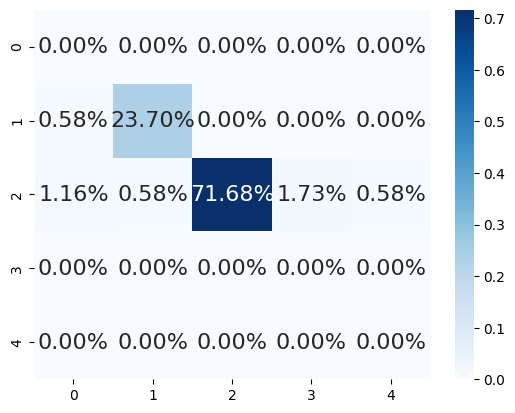

In [59]:
TN = cm2[1][1]
FN = cm2[2][3]
TP = cm2[2][2]
FP = cm2[2][0]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm2)



sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [60]:
with open("Liver-SLP.pkl","wb") as f:
    pickle.dump(model,f)

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'